<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 2: *Statistics & Data Visualization***

### **Tenggat Waktu: 16 September 2023, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab2_1806205773_Abdurrafi Arief.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 16 September 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) adalah suatu proses dalam melakukan analisis terhadap dataset dengan tujuan untuk melihat karakteristik utama dari data tersebut. EDA merupakan pemrosesan dasar yang hasilnya dapat mempengaruhi keputusan-keputusan yang diambil oleh seorang data scientist dalam melakukan pemrosesan data di tahap selanjutnya. Pada proses ini sering melibatkan dua hal yang akan kita pelajari pada Lab kali ini, yaitu *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Smartphone Specification

Dataset yang digunakan pada Lab kali ini merepresentasikan data spesifikasi dari *smartphone* yang beredar pada pasar saat ini. Berikut merupakan deskripsi dari setiap kolom yang ada pada dataset tersebut

* `Brand` : Nama Merk/Brand *smartphone*
* `Phone` : Nama Tipe/Model *smartphone*
* `Price` : Harga *smartphone*
* `Screensize (inches)` : Ukuran layar *smartphone* dalam satuan inci
* `Camera_Nos` : Jumlah kamera belakang pada *smartphone*
* `Front Camera (MP)` : Besar Megapixel kamera depan *smartphone*
* `Rear Camera (MP)` :  Besar Megapixel kamera belakang *smartphone*
* `Memory (GB)` : Besar penyimpanan dalam Gigabyte
* `RAM (GB)` : Besar RAM dalam Gigabyte
* `Battery (mAh)` : Besar baterai Smartphone
* `Rating` : Penilaian produk smartphone tersebut

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [52]:
df = pd.read_csv('SmartphoneSpecs.csv')

In [53]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 910
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


In [54]:
# Menghitung jumlah data missing value per atribut
col_na = df.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                     Total   Percent
Memory (GB)             29  0.031868
RAM (GB)                23  0.025275
Screensize (inches)     12  0.013187
Battery (mAh)            9  0.009890
Front Camera (MP)        8  0.008791
Rear Camera (MP)         3  0.003297


Karena terdapat missing value pada data tersebut dengan jumlah yang relatif kecil dengan nilai terbesar 0.032% saja. Maka dari itu, untuk saat ini kita akan menghapus baris data yang memiliki missing value tersebut. Untuk proses *pre-processing data* akan kalian pelajari secara lebih lanjut pada Lab selanjutnya.

In [55]:
# Hapus baris yang memiliki missing value
df.dropna(inplace=True)

In [56]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 848
Jumlah atribut: 11


,Brand,Phone,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
0,Xiaomi,Xiaomi Redmi Note 10,13999,6.43,4,13.0,48.0,64.0,4.0,5000.0,3
1,Vivo,Vivo Y12s,9990,6.51,2,8.0,13.0,32.0,3.0,5000.0,1
2,Samsung,Samsung Galaxy M31s,15999,6.50,4,32.0,64.0,128.0,6.0,6000.0,2
3,Vivo,Vivo Y20,12990,6.51,3,8.0,13.0,64.0,4.0,5000.0,2
4,Realme,Realme 7i,13999,6.50,4,16.0,64.0,128.0,8.0,5000.0,3


Dapat terlihat bahwa jumlah data telah berkurang dari yang sebelumnya berjumlah 910 data menjadi 848 data. Data yang dikurangi tersebut merupakan data yang memiliki missing value. Maka dari itu, tidak ada lagi data yang memiliki missing value yang dapat terlihat pada hasil perintah berikut

Pada Pandas, terdapat metode `.info()` yang berguna untuk mendapatkan ringkasan informasi dari DataFrame, termasuk nama-nama kolom, jumlah data yang tidak null (non-null), dan tipe data untuk setiap kolom. Penggunaan metode ini membantu kita dengan cepat memahami struktur DataFrame yang sedang kita kerjakan.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 848 entries, 0 to 909
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                848 non-null    object 
 1   Phone                848 non-null    object 
 2   Price                848 non-null    int64  
 3   Screensize (inches)  848 non-null    float64
 4   Camera_Nos           848 non-null    int64  
 5   Front Camera (MP)    848 non-null    float64
 6   Rear Camera (MP)     848 non-null    float64
 7   Memory (GB)          848 non-null    float64
 8   RAM (GB)             848 non-null    float64
 9   Battery (mAh)        848 non-null    float64
 10  Rating               848 non-null    int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 79.5+ KB


Selain itu, terdapat juga metode .describe() yang berguna untuk menghasilkan statistik deskriptif dari suatu DataFrame. Melalui metode ini, kita bisa memperoleh ringkasan statistik yang cukup menggambarkan terkait central tendency, persebaran data, dan bentuk distribusi dari kumpulan data tersebut.

In [58]:
df.describe()

,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,22500.871462,6.045649,2.301887,13.798349,25.679245,92.830189,4.752358,3888.193396,1.396226
std,20643.214336,0.606627,1.116960,9.044017,21.453267,87.672189,2.477048,938.662621,0.611642
min,905.000000,2.450000,1.000000,1.200000,5.000000,8.000000,1.000000,950.000000,1.000000
25%,9598.500000,5.500000,1.000000,8.000000,12.000000,32.000000,3.000000,3100.000000,1.000000
50%,14999.000000,6.260000,2.000000,12.000000,13.000000,64.000000,4.000000,4000.000000,1.000000
75%,27992.250000,6.500000,3.000000,16.000000,48.000000,128.000000,6.000000,4500.000000,2.000000
max,173999.000000,7.600000,5.000000,48.000000,108.000000,512.000000,12.000000,7000.000000,3.000000


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mari kita mengingat kembali materi yang terdapat pada Mata Kuliah StatProb, diantaranya sebagai berikut:
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Screensize (inches)`:

In [59]:
screensize_arr = df['Screensize (inches)']

stats = [
    ['Mean', np.mean(screensize_arr)],
    ['Median', np.median(screensize_arr)],
    ['Mode', scp.mode(screensize_arr)[0]],
    ['Standard Deviation', np.std(screensize_arr)],
    ['Variance', np.var(screensize_arr)],
    ['Minimum', np.min(screensize_arr)],
    ['Maximum', np.max(screensize_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,6.045649
1,Median,6.260000
2,Mode,5.500000
3,Standard Deviation,0.606269
4,Variance,0.367562
5,Minimum,2.450000
6,Maximum,7.600000


Pada hasil di atas, bisa kita lihat bahwa nilai terbesar dimiliki oleh Mean dengan urutan sebagai berikut:
`median` > `mean` > `mode`

Data tersebar sebesar 0.61 dari nilai `mean`. dengan nilai maksimum 7.6 dan minimum 2.45. Kemungkinan data cenderung padat di nilai yang tinggi atau padat ke kanan.

<ipython-input-60-6a0da76b2359>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(screensize_arr, shade=True)


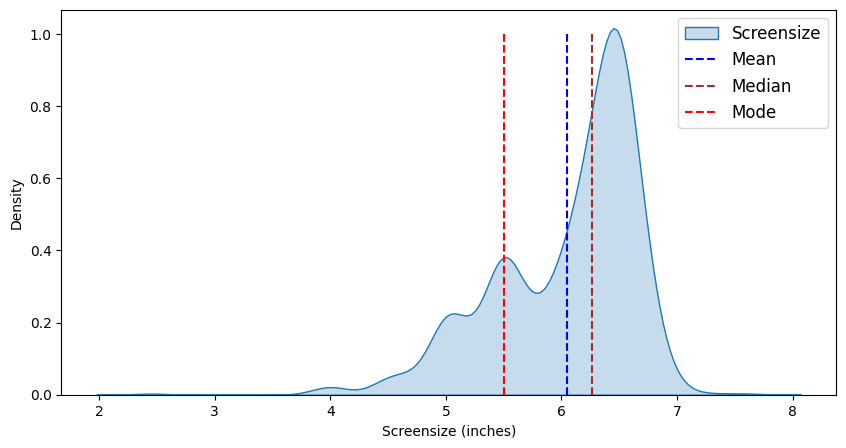

In [60]:
plt.figure(figsize=(10,5))
sns.kdeplot(screensize_arr, shade=True)
plt.vlines(x=np.mean(screensize_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(screensize_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(screensize_arr)[0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Screensize', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `left skewed` karena distribusi data lebih berat di sebelah kanan dan memiliki ekor yang panjang di sebelah kiri. Dapat terlihat pula pada visualisasi data di atas, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data karena distribusi data bersifat left skewed.

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan visualisasi overlapping KDE plot. Sebagai contoh jika kita ingin membandingkan distribusi Screen Size pada Xiaomi dan Samsung, berikut merupakan penerapan KDE plot-nya

<ipython-input-61-5182aa2596f1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
<ipython-input-61-5182aa2596f1>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(samsung['Screensize (inches)'], shade=True)


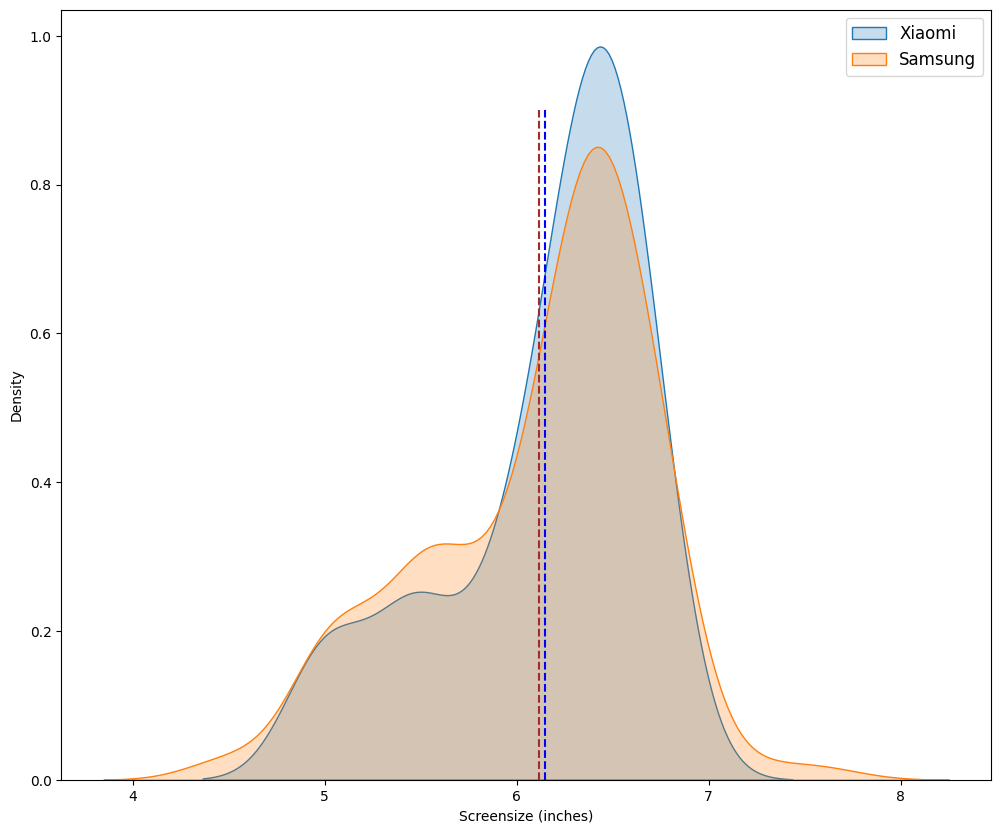

In [61]:
# KDE Plot
xiaomi = df[df['Brand'] == 'Xiaomi']
samsung = df[df['Brand'] == 'Samsung']
plt.figure(figsize=(12,10))
sns.kdeplot(xiaomi['Screensize (inches)'], shade=True)
sns.kdeplot(samsung['Screensize (inches)'], shade=True)
plt.legend(['Xiaomi','Samsung'], fontsize=12)
plt.vlines(x=xiaomi['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=samsung['Screensize (inches)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi dalam ranah *data science* merujuk pada hubungan statistik antara dua atau lebih variabel. Melalui korelasi, membantu kita memahami bagaimana perubahan dalam suatu variabel akan berkaitan dengan perubahan dalam variabel lainnya. Korelasi mengukur sejauh mana dua variabel bergerak bersamaan atau dependensi dalam suatu pola tertentu.

Dalam konteks korelasi, ada dua jenis korelasi yang umum digunakan:

* Korelasi Positif: Ketika dua variabel memiliki korelasi positif, artinya ketika satu variabel naik, yang lainnya juga cenderung naik, dan sebaliknya. Ini mengindikasikan adanya hubungan searah antara kedua variabel tersebut.

* Korelasi Negatif: Jika dua variabel memiliki korelasi negatif, artinya ketika satu variabel naik, yang lainnya cenderung turun, dan sebaliknya. Ini menunjukkan adanya hubungan terbalik atau lawan antara kedua variabel tersebut.

Korelasi dapat diukur dengan menggunakan koefisien korelasi, yang paling umum digunakan adalah dengan menghitung koefisien **korelasi Pearson**. Koefisien ini memiliki nilai antara -1 hingga 1:

* Nilai +1 menunjukkan korelasi positif sempurna, yaitu kedua variabel bergerak searah secara linier.
* Nilai -1 menunjukkan korelasi negatif sempurna, yaitu kedua variabel bergerak terbalik secara linier.
* Nilai 0 menunjukkan tidak ada korelasi linier antara kedua variabel tersebut.


Korelasi adalah alat penting dalam analisis data, karena membantu kita mengidentifikasi hubungan antara variabel, memprediksi perilaku data atau variabel, dan membuat keputusan yang lebih baik berdasarkan pemahaman tentang bagaimana variabel-variabel tersebut berkaitan antar satu sama lainnya. Namun, penting untuk diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat, dan perlu berhati-hati dalam mengartikan hasil korelasi.



In [62]:
# Implementasi korelasi Pearson
df.corr(method='pearson')

<ipython-input-62-ec60b670cac3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Price,Screensize (inches),Camera_Nos,Front Camera (MP),Rear Camera (MP),Memory (GB),RAM (GB),Battery (mAh),Rating
Price,1.000000,0.279743,0.255461,0.276826,0.260423,0.659269,0.591847,0.014406,0.184664
Screensize (inches),0.279743,1.000000,0.725854,0.508298,0.531006,0.427751,0.602524,0.733120,0.389417
Camera_Nos,0.255461,0.725854,1.000000,0.546458,0.669166,0.416711,0.589898,0.632693,0.467579
Front Camera (MP),0.276826,0.508298,0.546458,1.000000,0.620479,0.387675,0.622373,0.331991,0.372598
Rear Camera (MP),0.260423,0.531006,0.669166,0.620479,1.000000,0.369280,0.622262,0.481070,0.522019
Memory (GB),0.659269,0.427751,0.416711,0.387675,0.369280,1.000000,0.709825,0.198526,0.257357
RAM (GB),0.591847,0.602524,0.589898,0.622373,0.622262,0.709825,1.000000,0.383067,0.437329
Battery (mAh),0.014406,0.733120,0.632693,0.331991,0.481070,0.198526,0.383067,1.000000,0.346563
Rating,0.184664,0.389417,0.467579,0.372598,0.522019,0.257357,0.437329,0.346563,1.000000


Dari perhitungan korelasi Pearson di atas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi. Berdasarkan tabel di atas, pasangan atribut yang memiliki relasi yang tinggi adalah pasangan atribut `Camera_Nos` dengan `Screensize (inches)` dan `Rear Camera (MP)`. Untuk membuktikannya, di bawah ini terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Camera_Nos`, yaitu:
* `Screensize (inches)`: 0.73
* `Rear Camera (MP)`: 0.67

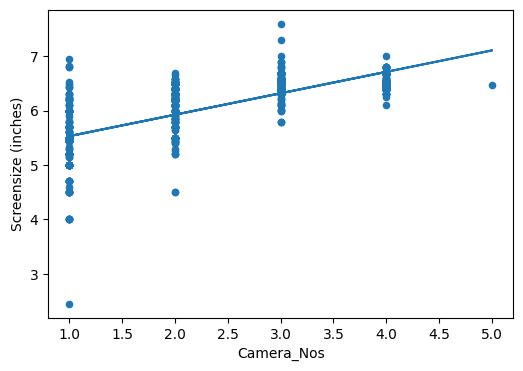

In [63]:
# Scatterplot Camera_Nos dan Screensize (inches)
w = df["Camera_Nos"]
z = df["Screensize (inches)"]
df.plot.scatter(x="Camera_Nos", y="Screensize (inches)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

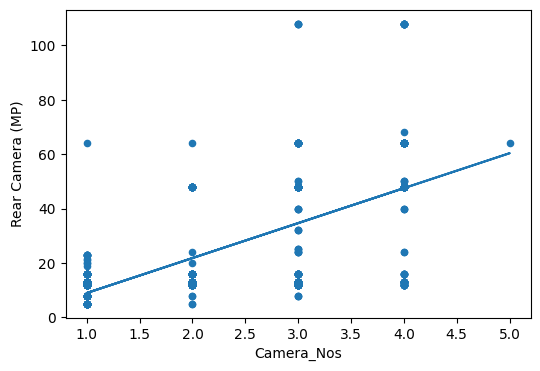

In [64]:
# Scatterplot Camera_Nos dan Rear Camera (MP)
w = df["Camera_Nos"]
z = df["Rear Camera (MP)"]
df.plot.scatter(x="Camera_Nos", y="Rear Camera (MP)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<Axes: xlabel='count', ylabel='Brand'>

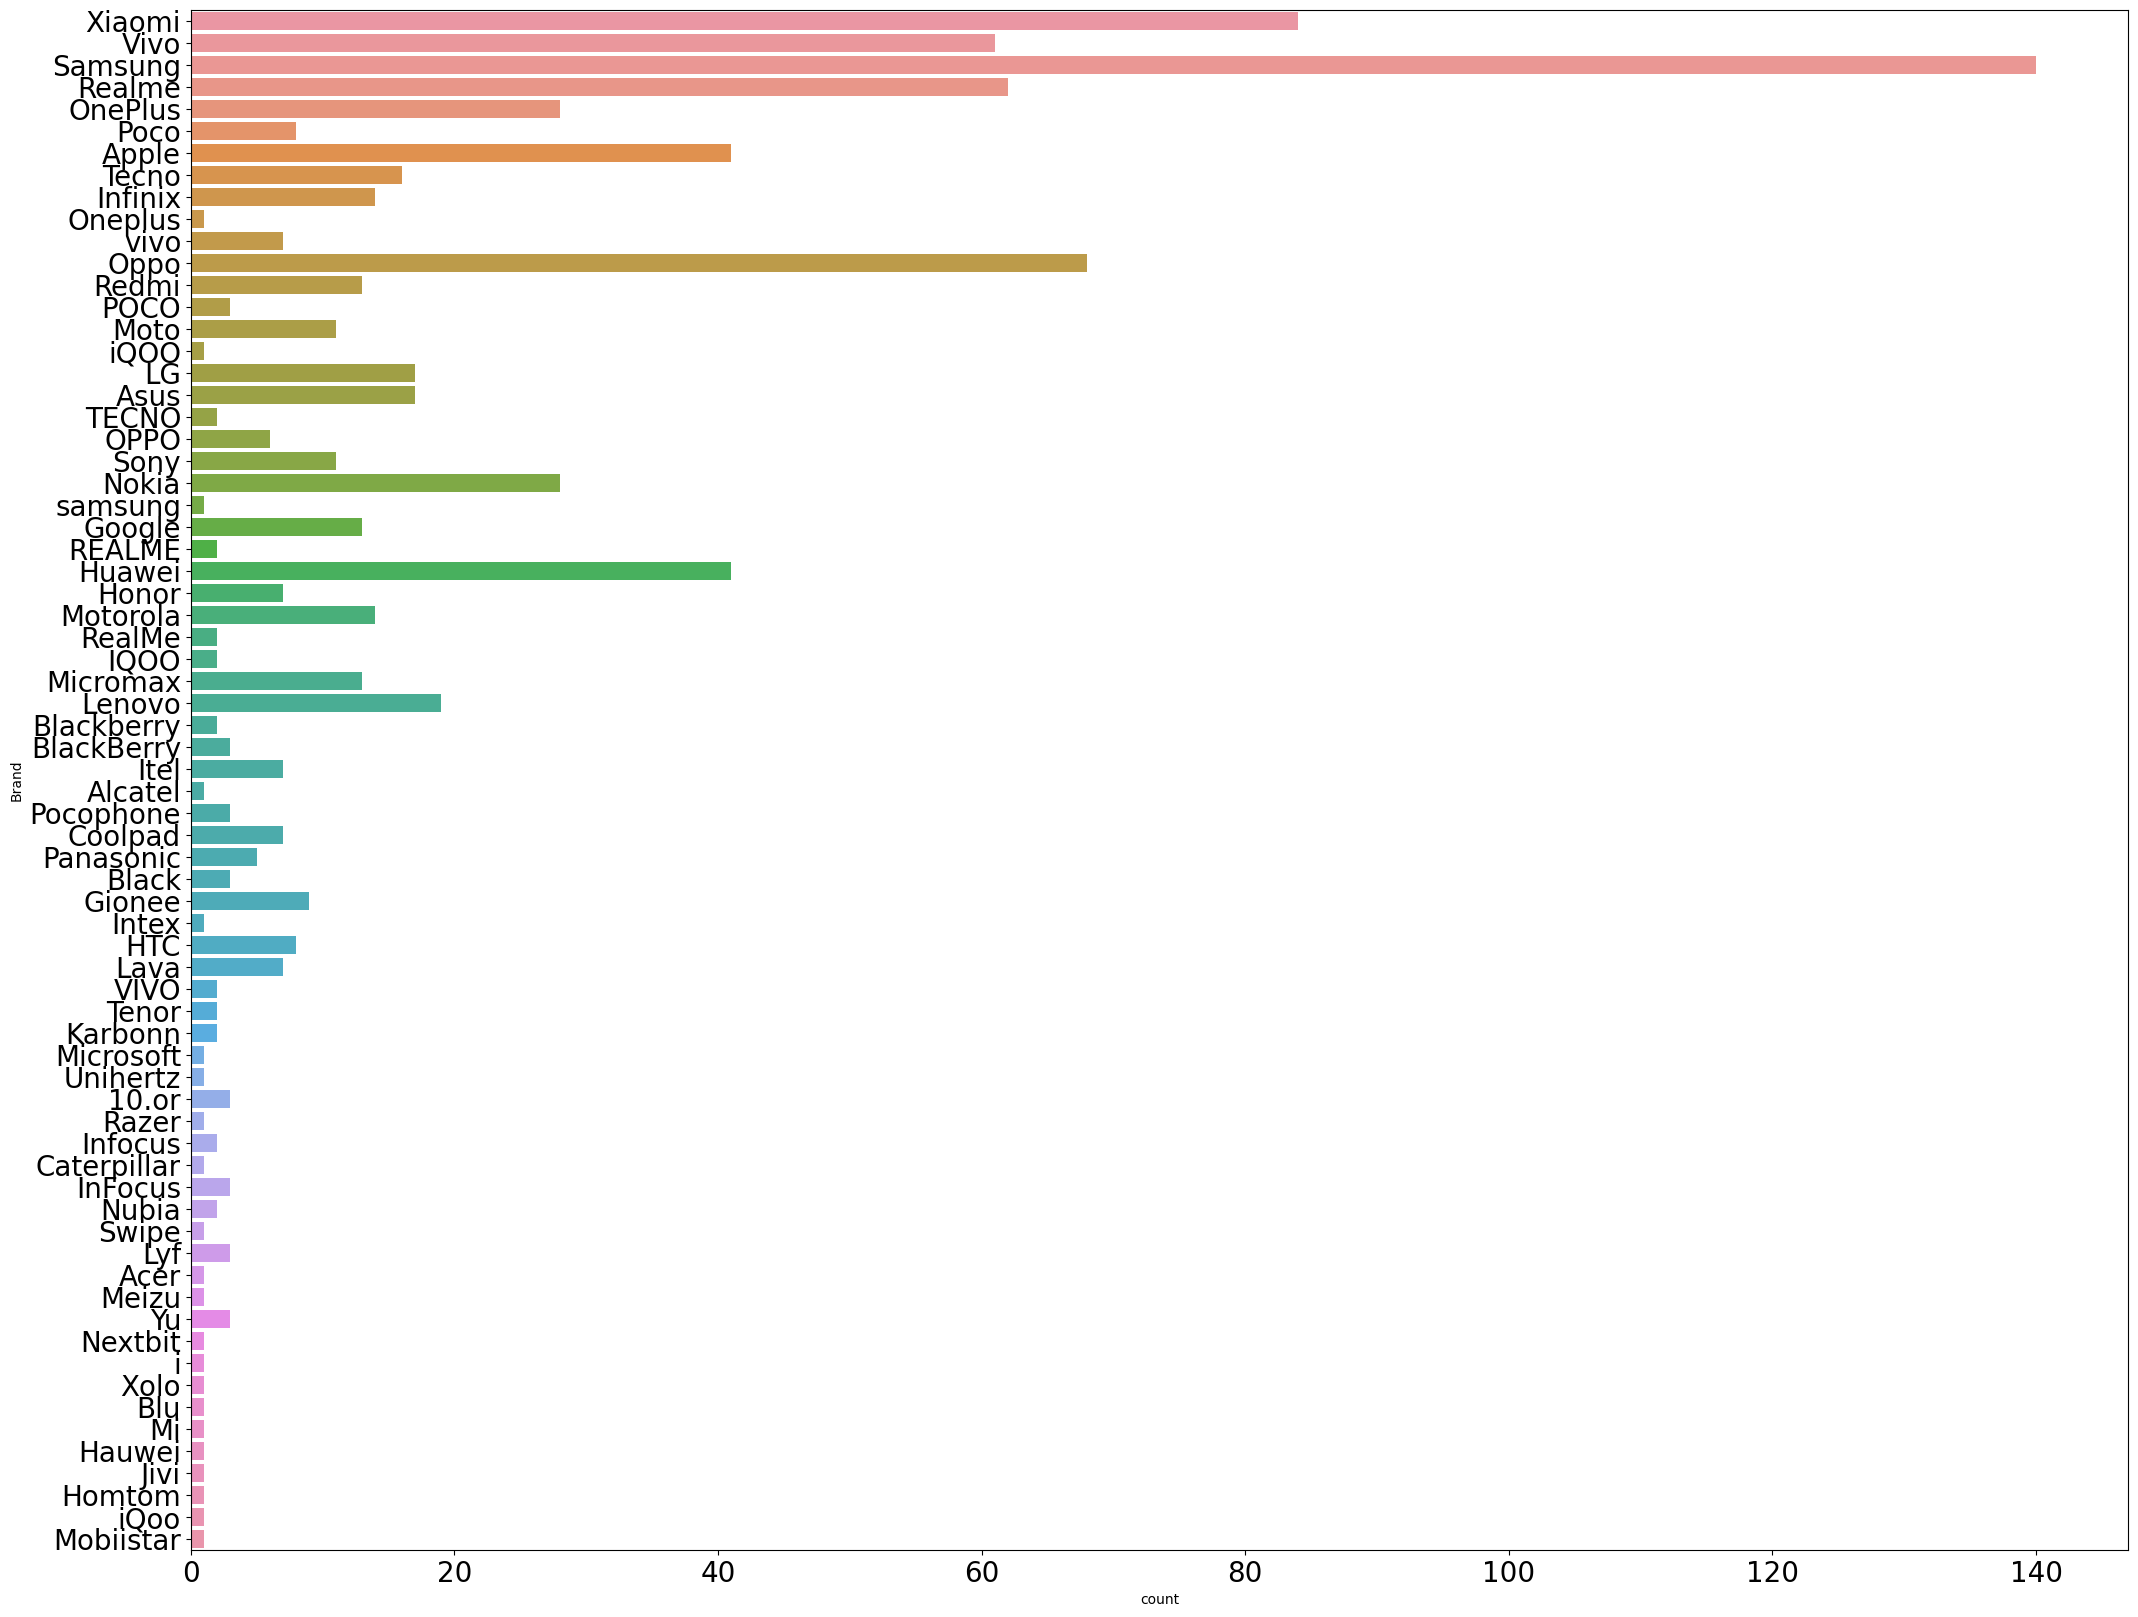

In [65]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Brand', data=df)

Bisa kita lihat pada countplot di atas bahwa Samsung merupakan brand smartphone yang memiliki tipe terbanyak. Berikut merupakan contoh jika kita ingin mendapatkan visualisasi data yang telah diurutkan dari yang paling besar hingga terkecil berdasarkan nilai yang dimilikinya.

<Axes: xlabel='count', ylabel='Brand'>

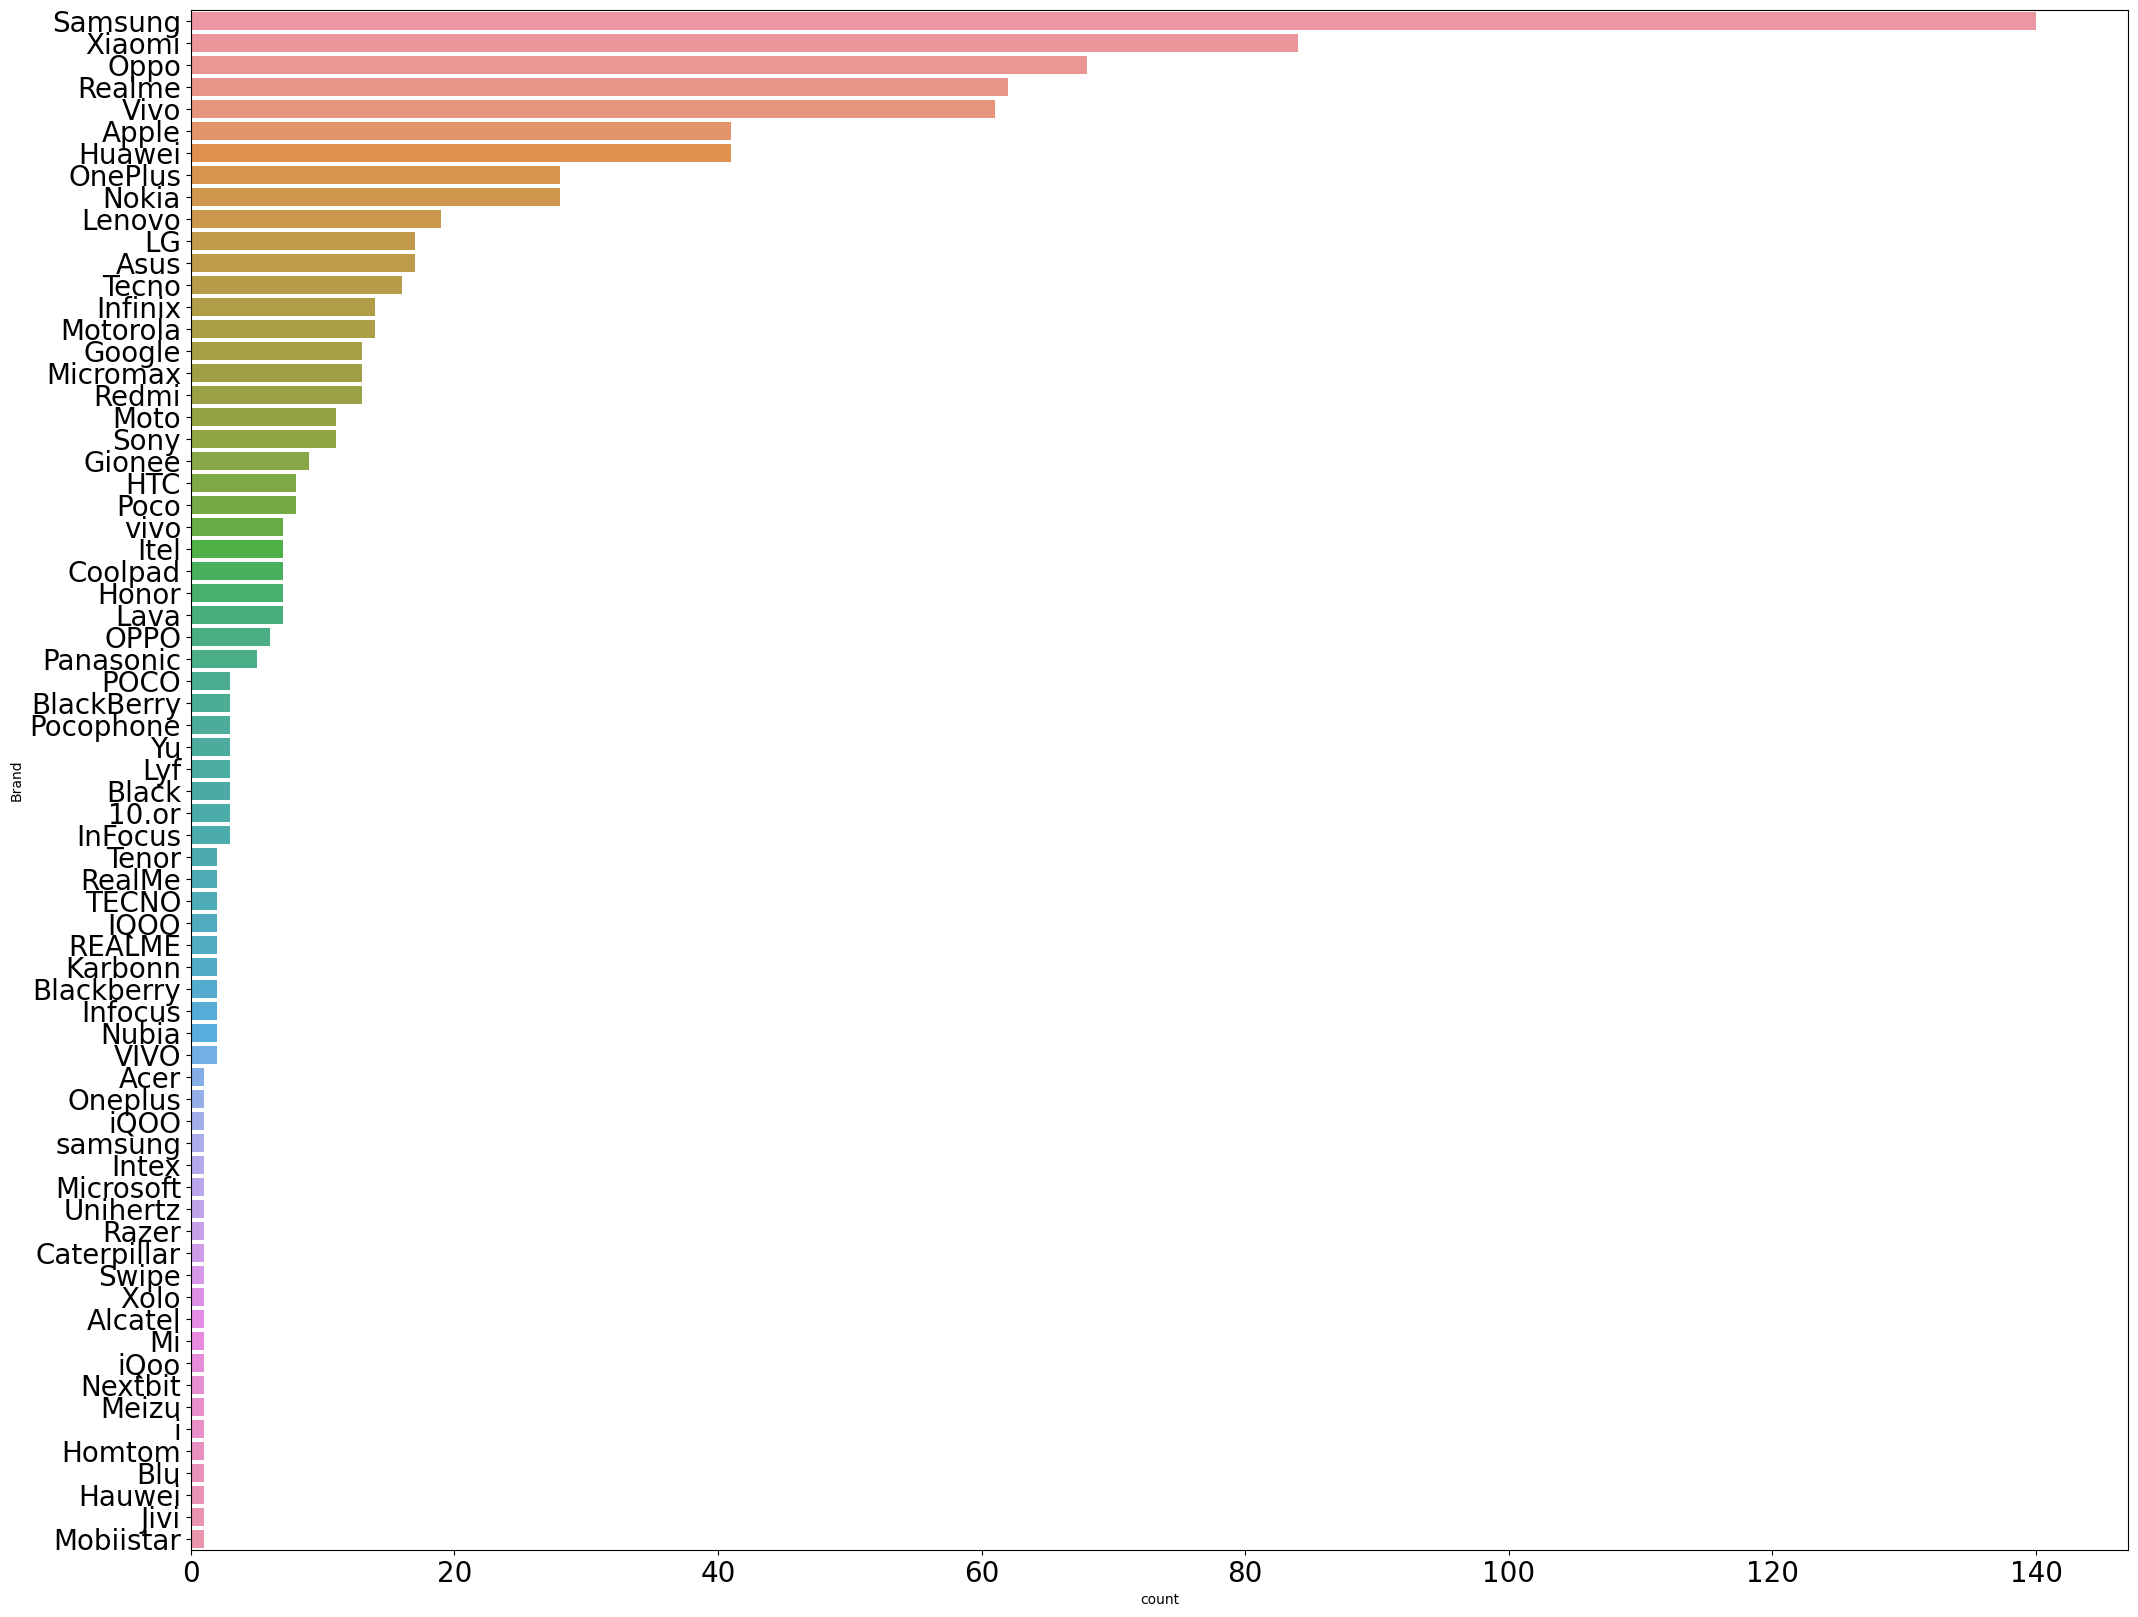

In [66]:
# Calculate the counts of each brand and sort them in descending order
brand_counts = df['Brand'].value_counts().sort_values(ascending=False)

# Create a countplot with sorted order
plt.figure(figsize=(25, 20))
plt.yticks(size=20)
plt.xticks(size=20)
sns.countplot(y='Brand', data=df, order=brand_counts.index)

<Axes: xlabel='count', ylabel='Memory (GB)'>

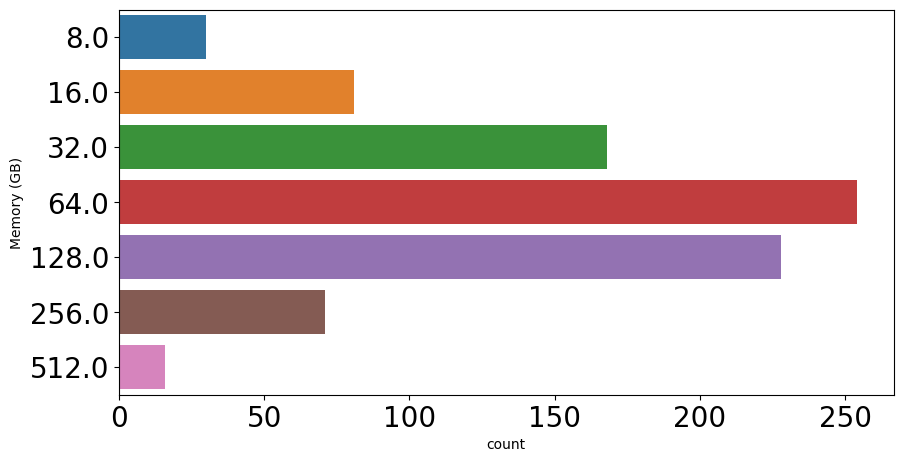

In [67]:
plt.figure(figsize=(10,5))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
sns.countplot(y='Memory (GB)', data=df)

Dari countplot, dapat terlihat bahwa jumlah penyimpanan *smartphone* paling banyak adalah sebesar 64 GB dan 512 GB jumlah penyimpanan paling sedikit.

<Axes: xlabel='Brand', ylabel='RAM (GB)'>

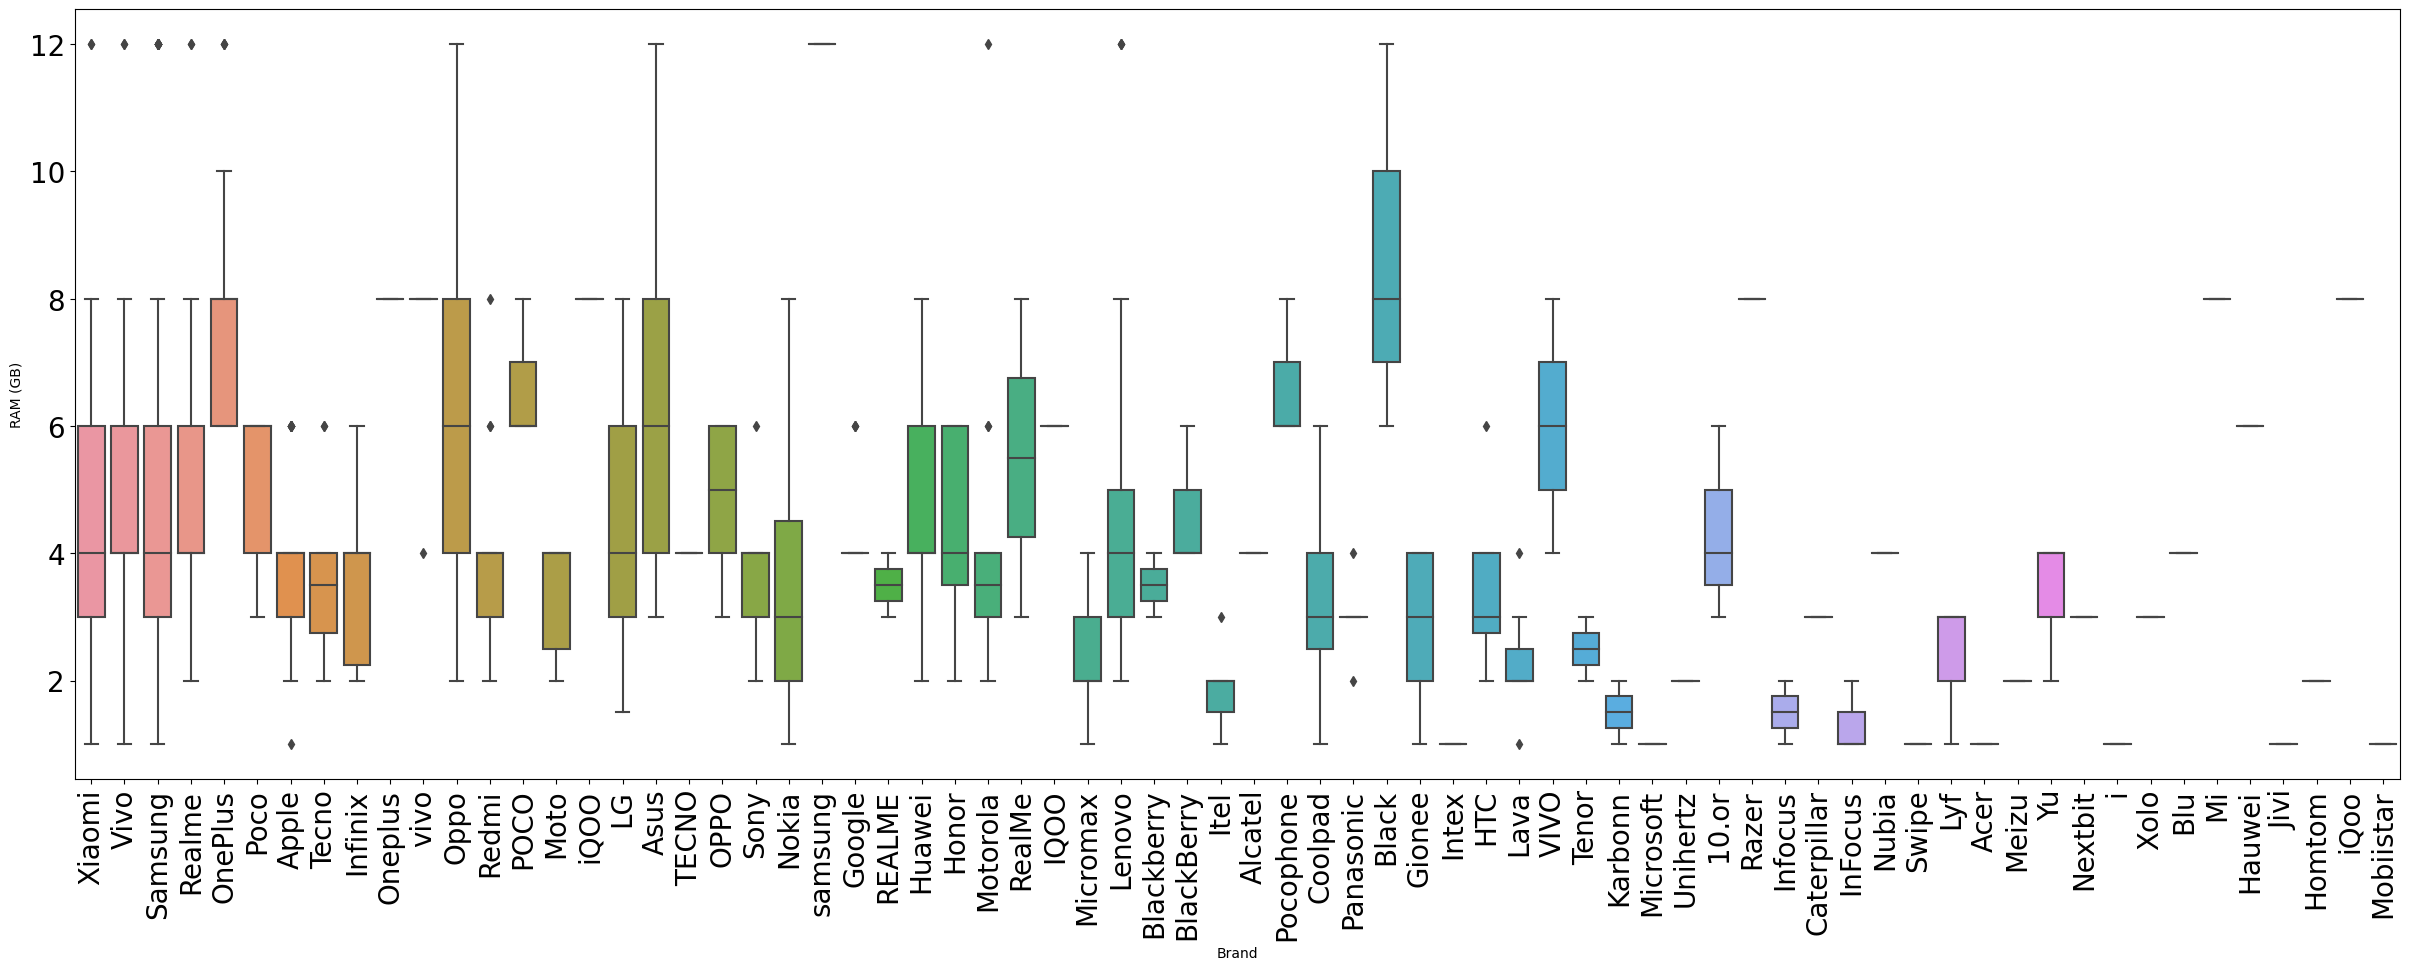

In [68]:
# Menampilkan boxplot Make terhadap RAM (GB)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Brand', y='RAM (GB)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut <font color='red'>**Memory (GB)**</font>! (hint: harap tambahkan range, Q1, Q2, Q3) ***[revised]***

In [69]:
# Jawab
memory_arr = df['Memory (GB)']
stats = [
    ['Mean', np.mean(memory_arr)],
    ['Median', np.median(memory_arr)],
    ['Mode', scp.mode(memory_arr)[0]],
    ['Standard Deviation',np.std(memory_arr)],
    ['Variance', np.var(memory_arr)],
    ['Minimum', np.min(memory_arr)],
    ['Maximum', np.max(memory_arr)],
    ['Q1', memory_arr.quantile(0.25)],
    ['Q2', memory_arr.quantile(0.5)],
    ['Q3', memory_arr.quantile(0.75)]
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,92.830189
1,Median,64.000000
2,Mode,64.000000
3,Standard Deviation,87.620480
4,Variance,7677.348523
5,Minimum,8.000000
6,Maximum,512.000000
7,Q1,32.000000
8,Q2,64.000000
9,Q3,128.000000


(b) Apa central tendency paling cocok untuk atribut <font color='red'>**Memory (GB)**</font>? Berikan alasan! ***[revised]***

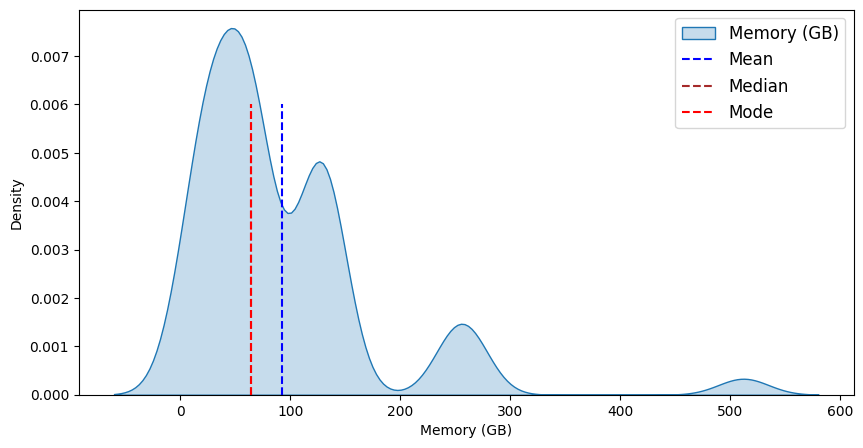

In [70]:
# Jawab

plt.figure(figsize=(10,5))
sns.kdeplot(memory_arr, fill=True)
plt.vlines(x=np.mean(memory_arr), ymin=0, ymax=0.006, color='blue', linestyle='--')
plt.vlines(x=np.median(memory_arr), ymin=0, ymax=0.006, color='brown', linestyle='--')
plt.vlines(x=scp.mode(memory_arr)[0], ymin=0, ymax=0.006, color='red', linestyle='--')
plt.legend(['Memory (GB)', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

(c) Buatlah heatmap dari korelasi Pearson pada dataset `SmartphoneSpecs.csv` dan berikan analisis Anda terhadap heatmap tersebut!

<ipython-input-71-298138f3d1ee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, fmt="0.2f")


Text(0.5, 1.0, 'SmartphoneSpecs.scv Heatmap Correlation Matrix')

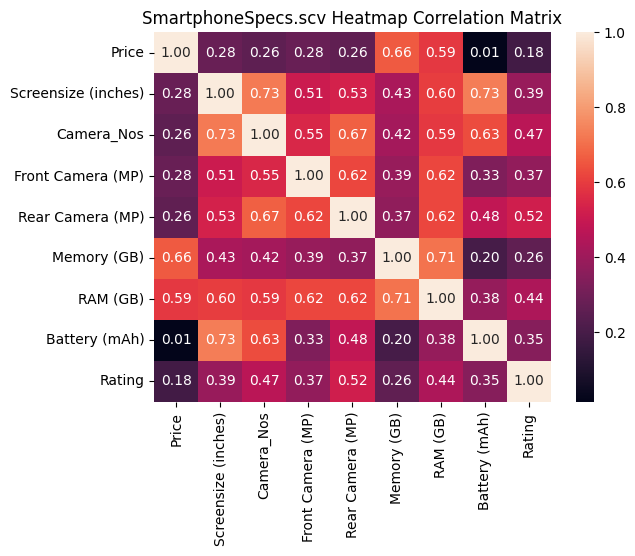

In [71]:
# Jawab
sns.heatmap(df.corr(method='pearson'), annot=True, fmt="0.2f")
plt.title('SmartphoneSpecs.scv Heatmap Correlation Matrix')

Pearson correlation (r) merupakan satuan yang menunjukan korelasi linear. Koefisien ini memiliki nilai antara -1 hingga 1. Semakin mendekati 1 (atau -1), maka semakin besar korelasi antara kedua variabel tersebut. (+ untuk korelasi positif & - untuk korelasi negatif).

Berdasarkan Heatmap Correlation Matrix di atas dapat disimpulkan:

1. Diagonal pada matrix akan selalu menghasilkan Perfect Correlation karena korelasi suatu kolom dengan diri sendirinya akan selalu sempurna. Sehingga, diagonal akan dihiraukan dalam analisis

2. Strong Positive Correlations tergambarkan dengan warna jingga-kemerahan hingga krem
   Contoh:
    - Screensize (Inches) & Camera Nos : 0,73
    - Battery (mAh) & Screensize (Inches): 0,73
    
3. Moderate Positive Correlation tergambarkan dengan warna ungu gelap hingga unggu maroon
    Contoh:
    -  Rear Camera (MP) & Rating : 0.18
    -  Front Camera (MP) & Memory (GB) : 0.39
    
4. Battery (mAh) & Price mempunyai nilai korelasi 0.01 (Hampir mendekati 0). Dengan kata lain, hubungan kedua variable tersebut sangatlah kecil hampir tidak ada.

### **SOAL 2: Data Visualization**

Untuk menjawab soal-soal berikut, pilihlah salah satu dari visualisasi di bawah ini yang merupakan visualisasi yang tepat untuk menjawab pertanyaan tersebut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Pada beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan pada soal tersebut.

**Harap tuliskan secara eksplisit chart apa yang Anda pilih beserta alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran Megapiksel dari kamera belakang yang dimiliki dari setiap merk *smartphone*. Apakah merek Sony memiliki ukuran Megapiksel dari kamera belakang terbesar?

<ipython-input-72-b9050947ad03>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brand = df.groupby(['Brand']).mean()


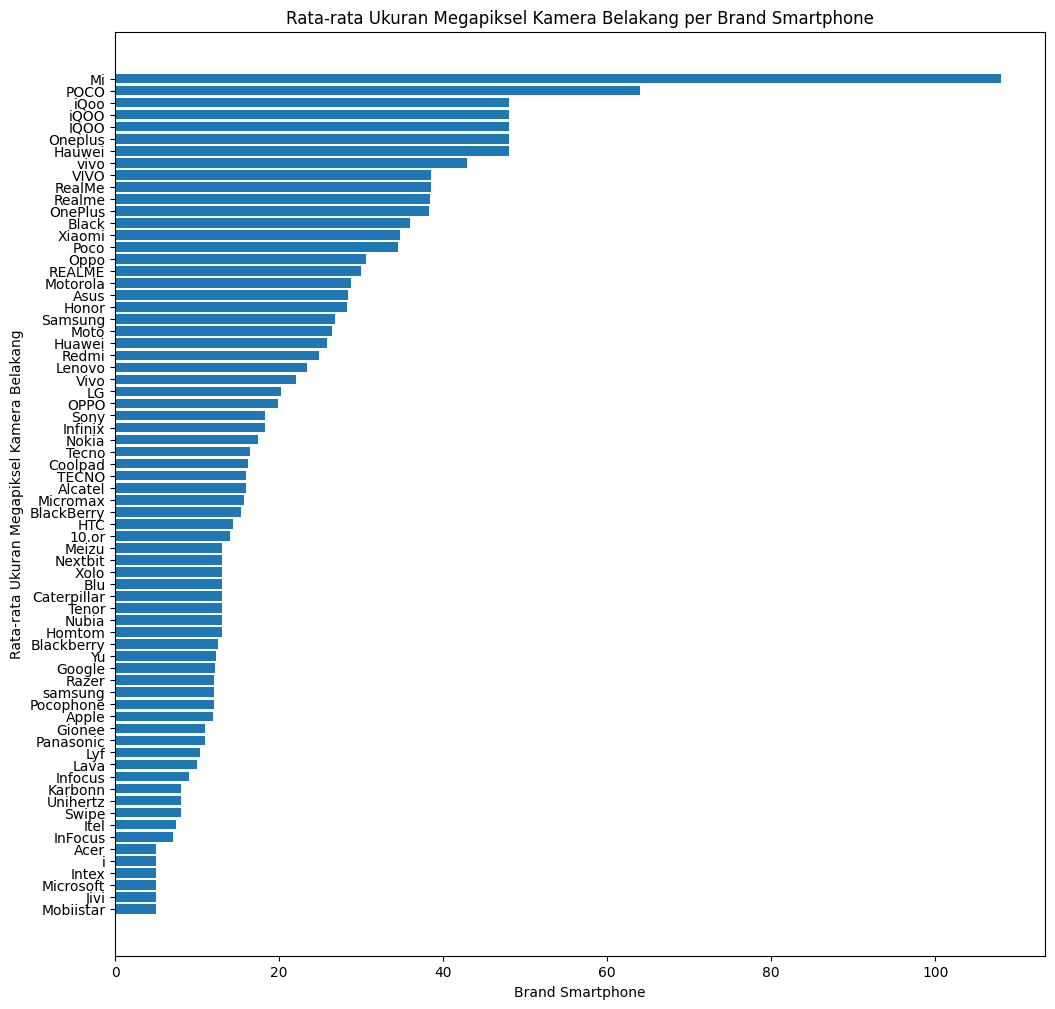

In [72]:
# Jawab
brand = df.groupby(['Brand']).mean()
camera = brand['Rear Camera (MP)'].sort_values(ascending=True)

plt.figure(figsize=(12,12))
plt.barh(camera.index, camera)
plt.xlabel('Brand Smartphone')
plt.ylabel('Rata-rata Ukuran Megapiksel Kamera Belakang')
plt.title('Rata-rata Ukuran Megapiksel Kamera Belakang per Brand Smartphone')
plt.show()

Saya telah memilih untuk menggunakan horizontal bar chart karena grafik ini efektif untuk membandingkan rata-rata ukuran megapiksel kamera belakang antara merek-merek smartphone. Setiap merek diwakili oleh batang horizontal yang memudahkan identifikasi merek dengan ukuran megapiksel terbesar.

Pengurutan dari terbesar ke terkecil memberikan gambaran yang jelas tentang merek yang memiliki ukuran megapiksel tertinggi. Label yang jelas dan judul grafik juga membuat informasi mudah diinterpretasikan.

Tidak, merek memiliki ukuran Megapiksel dari kamera belakang terbesar adalah Mi

(b) Buatlah visualisasi data persentase *smartphone* yang memiliki ukuran RAM yang lebih dari 6 GB. Dari hasil visualisasi tersebut berapakah persentase dari smartphone dengan nilai rating 3 dan memiliki RAM yang lebih dari 6 GB?

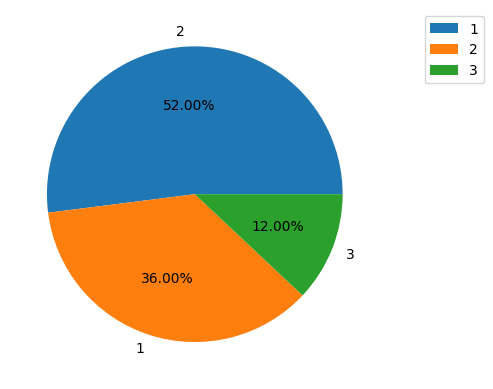

In [89]:
filtered_df = df.loc[df['RAM (GB)'] > 6]
percentage_rating = filtered_df['Rating'].value_counts()

plt.pie(percentage_rating, labels=percentage_rating.index, autopct='%1.2f%%')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()



Grafik yang paling sesuai untuk menggambarkan persentase smartphone dengan RAM lebih dari 6 GB adalah diagram lingkaran (pie chart). Diagram lingkaran merupakan pilihan yang tepat karena tugas ini memerlukan representasi visual dari keseluruhan, sehingga dapat menunjukkan proporsi masing-masing dalam bentuk persentase. Diagram lingkaran dapat menggambarkan perbandingan komponen atau kategori tertentu terhadap seluruh data. Dalam konteks ini, kita ingin menampilkan seberapa besar bagian dari total smartphone yang memiliki RAM di atas 6 GB.


Berdasarkan hasil visualisasi yang dihasilkan,
Smartphone dengan rating 3 memiliki persentase 12.00% .


(c) Buatlah visualisasi untuk melihat apakah terdapat outliers di atribut `Camera_Nos` untuk setiap besaran RAM. Berikan satu contoh RAM yang terlihat memiliki outlier dan berikan alasannya!

<Axes: xlabel='RAM (GB)', ylabel='Camera_Nos'>

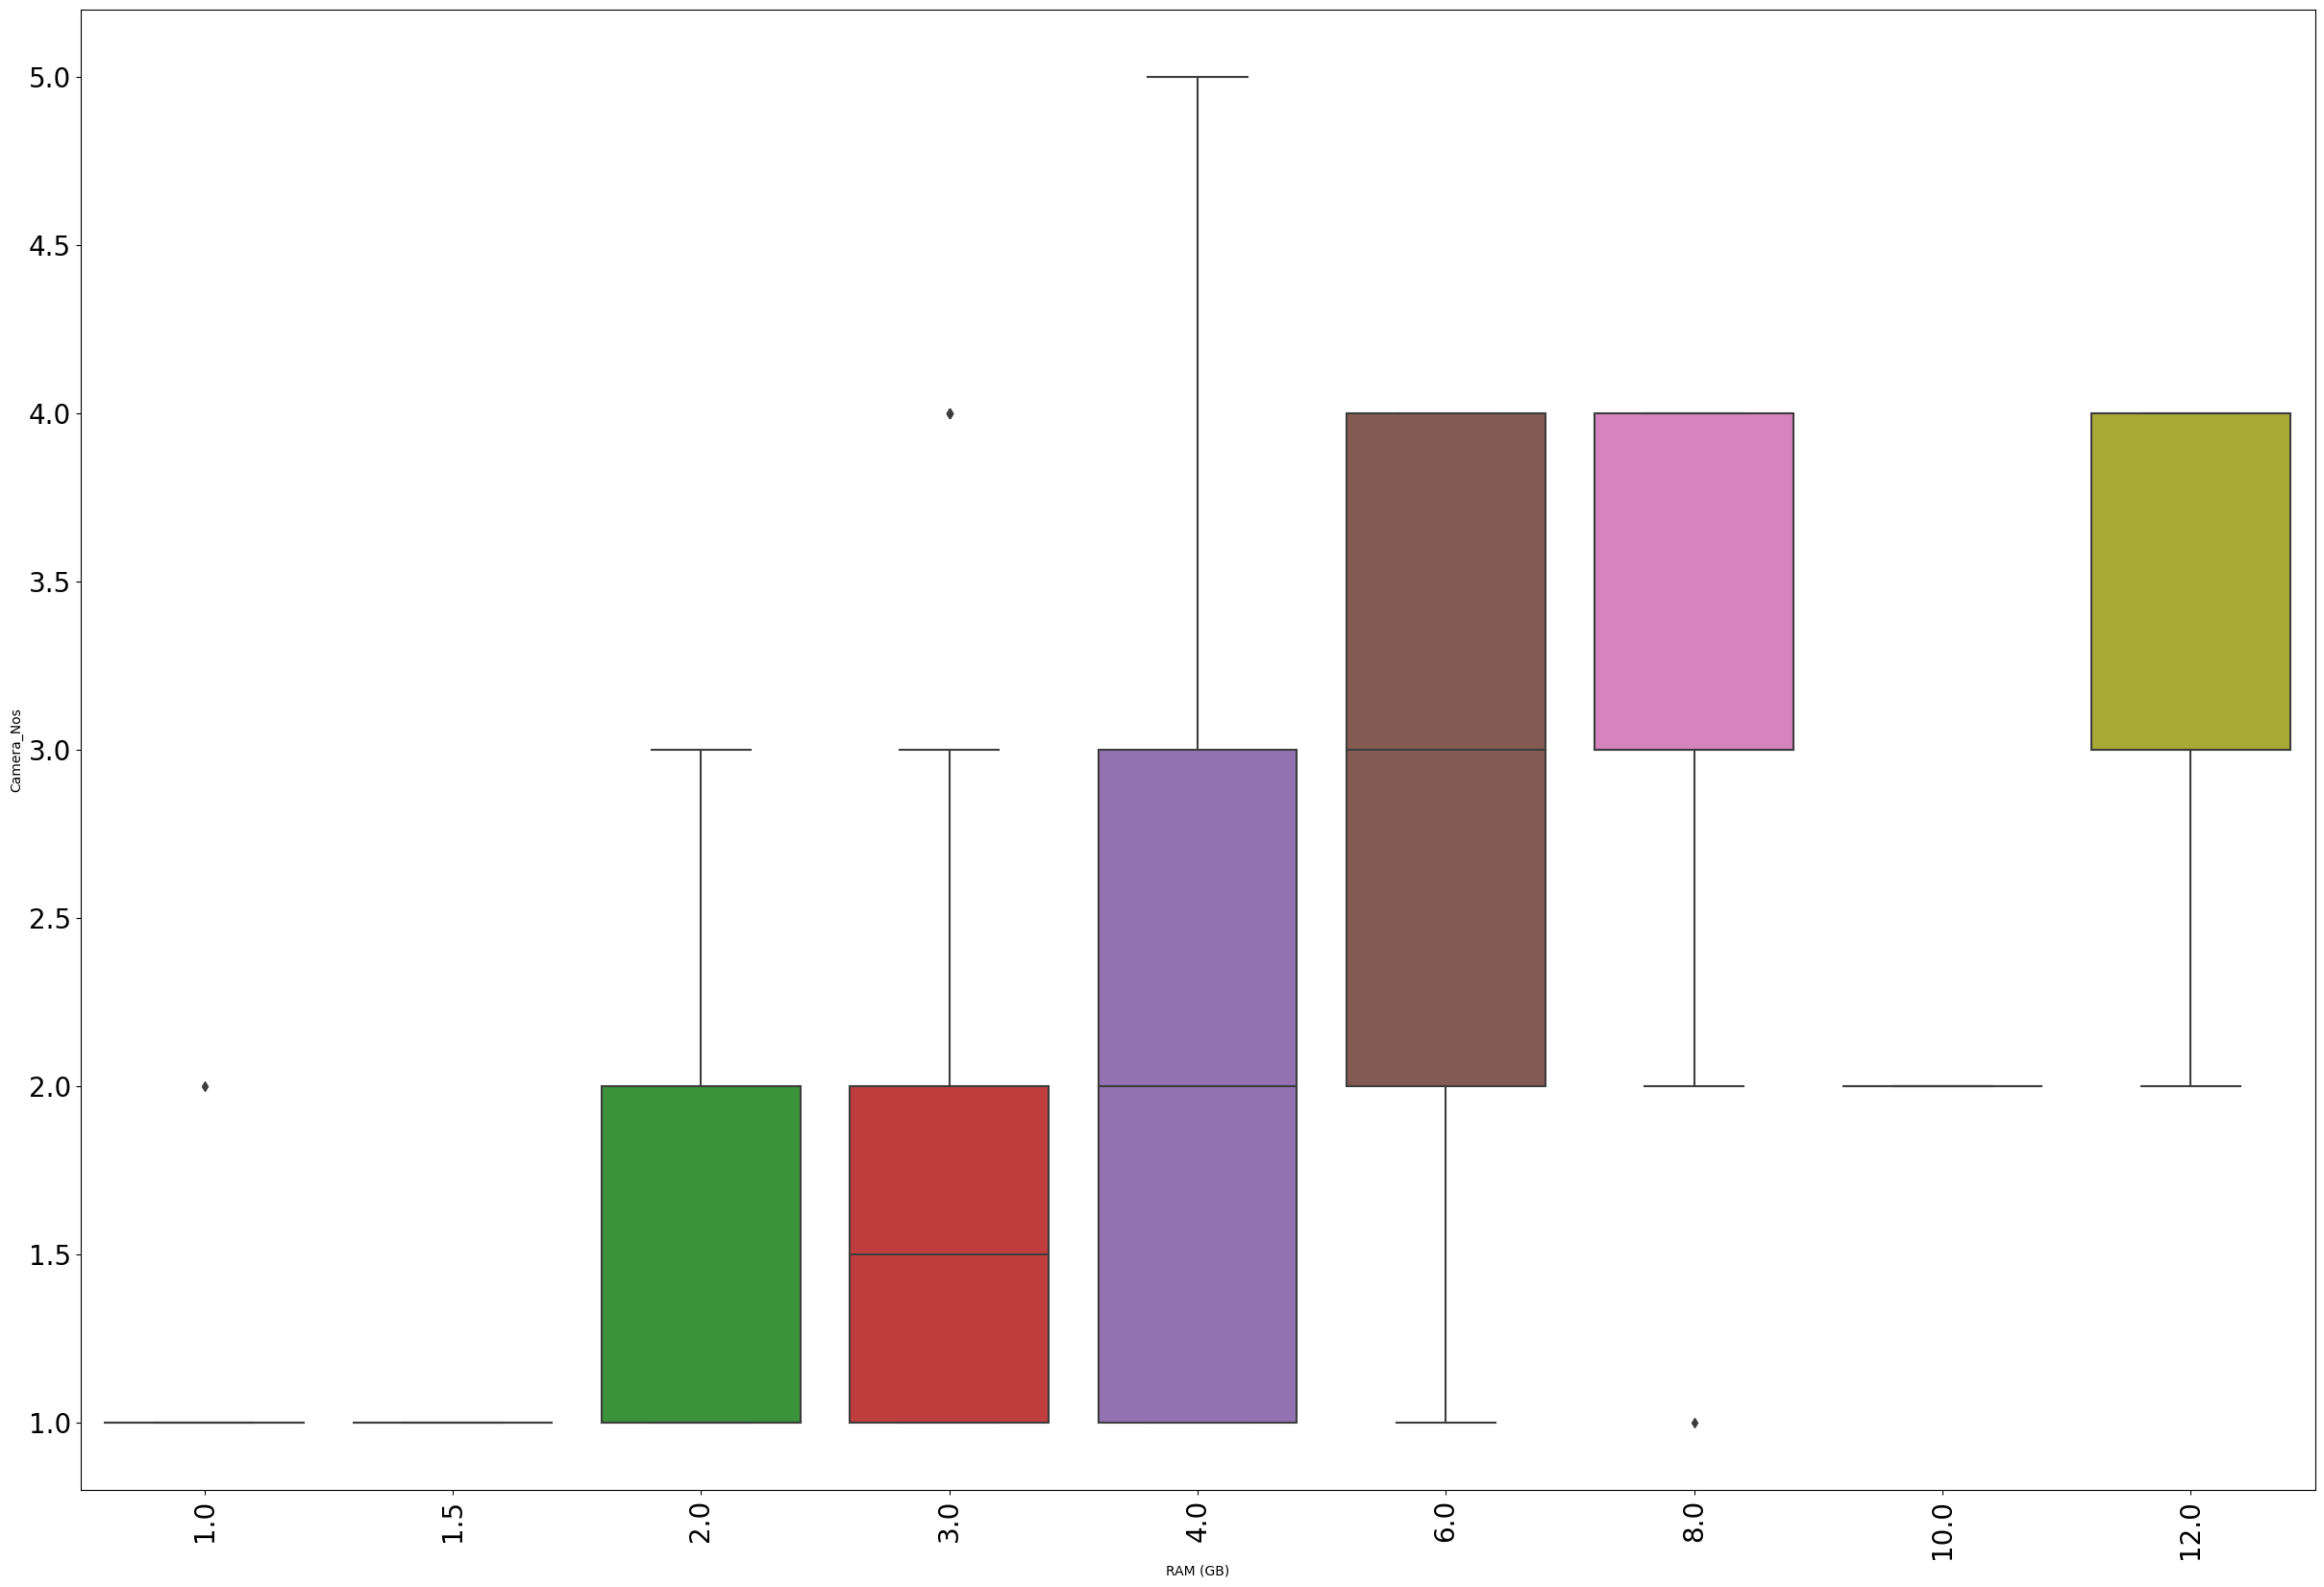

In [74]:
# Jawab
plt.figure(figsize=(30,20))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='RAM (GB)', y='Camera_Nos')

Chart yang paling cocok untuk memvisualisasikan apakah ada outlier atau tidak pada Camera nos adalah Box plot. Box plot memberikan ringkasan distribusi data, serta memungkinkan kita untuk dengan mudah melihat keberadaan outlier. Outlier ditandai dengan tanda titik yang terletak di atas atau di bawah batas 1.5 kali IQR (Interquartile Range).

RAM yang ada Outlier adalah 3.0, karena terlihat terdapat suatu data Camera_nos yang terletak di 4

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Battery (mAh) dan Screensize (inches). **Menurut Anda, apa hubungan yang dimiliki antara Battery dan Screensize ? Jelaskan!**

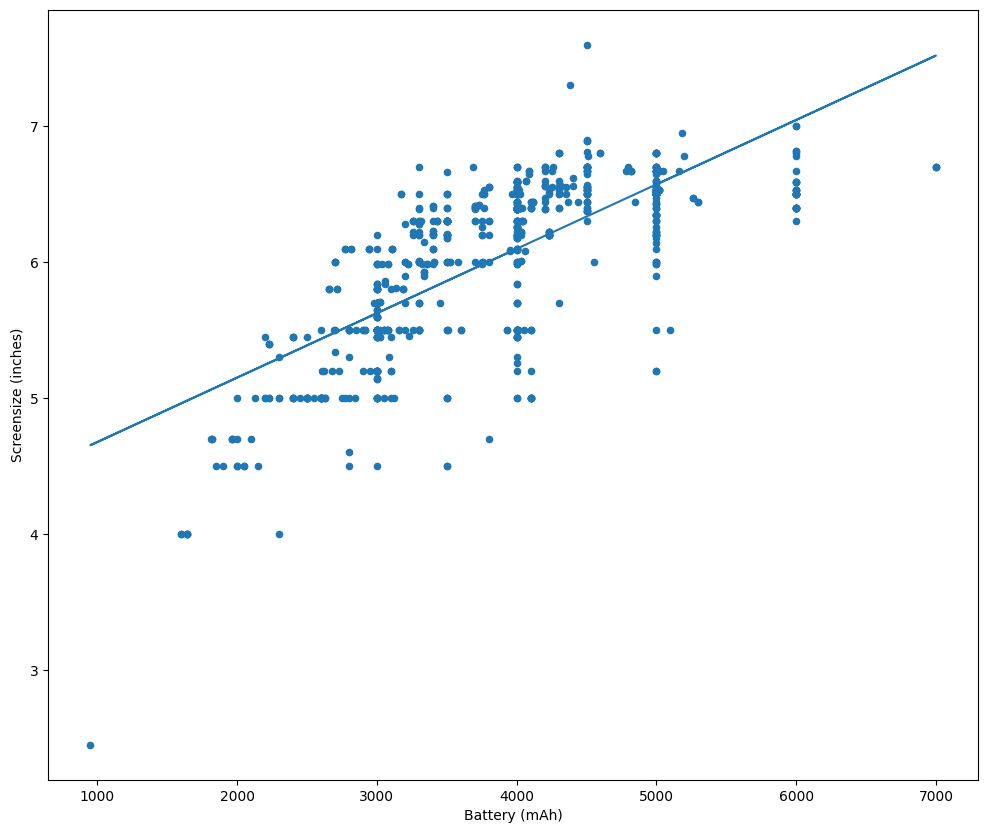

Pearson Correlation Coefficient: 0.7331199764560744


In [75]:
w = df["Battery (mAh)"]
z = df["Screensize (inches)"]
df.plot.scatter(x="Battery (mAh)", y="Screensize (inches)", figsize=(12,10))
b, m = polyfit(w, z, 1)
correlation = w.corr(z)
plt.plot(w, b + m * w, '-')
plt.show()
print(f"Pearson Correlation Coefficient: {correlation}")

Saya memilih scatter plot sebagai visualisasi yang tepat karena scatter plot digunakan untuk memahami hubungan atau korelasi antara dua variabel. Dalam kasus ini, kita ingin melihat hubungan antara Battery (mAh) dan Screensize (inches).

Dari scatter plot yang dihasilkan, kita dapat melihat apakah ada pola atau tren antara Battery dan Screensize. Jika titik-titik pada scatter plot cenderung membentuk pola naik atau turun, itu menunjukkan adanya hubungan antara keduanya. Misalnya, jika kita melihat bahwa semakin besar Screensize, maka semakin besar pula Battery (mAh), maka ini menunjukkan korelasi positif antara keduanya. Sebaliknya, jika tidak ada pola yang jelas dalam scatter plot, maka hubungan antara Battery dan Screensize mungkin tidak signifikan.


Dari visualisasi tersebut, terlihat bahwa terdapat hubungan positif antara Battery (mAh) dan Screensize (inches).

Korelasi antara kedua atribut ini sebesar  0.7331199764560744, yang menunjukkan korelasi positif yang kuat antara keduanya. Dengan kata lain, semakin besar Battery (mAh), semakin tinggi Screensize (inches).

(e) Visualisasikan distribusi data `Memory (GB)` pada Samsung dan Infinix. **Berikan analisis Anda!**

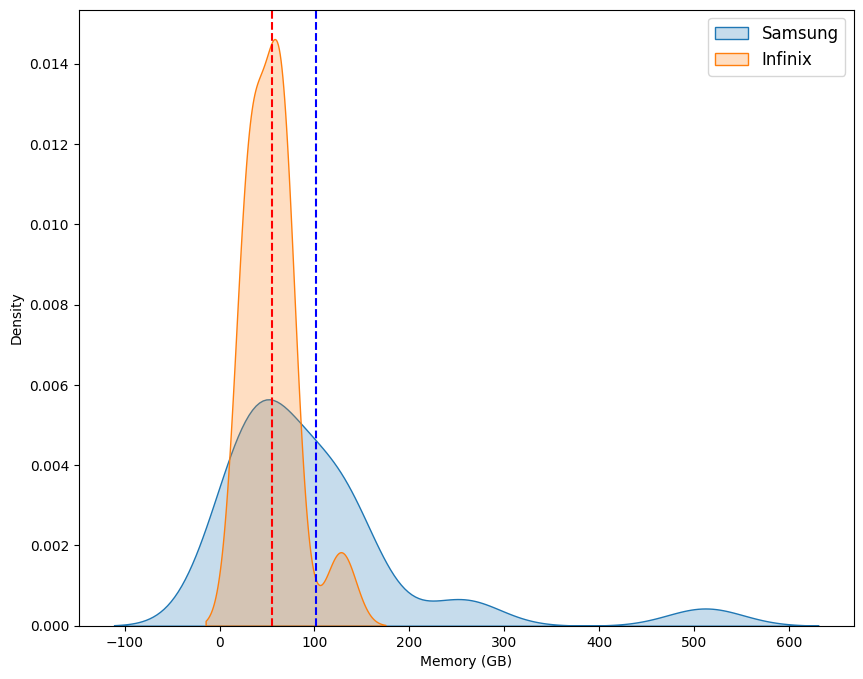

In [109]:
samsung = df[df['Brand'] == "Samsung"]
infinix = df[df['Brand'] == "Infinix"]

plt.figure(figsize=(10,8))
sns.kdeplot(samsung['Memory (GB)'], fill=True)
sns.kdeplot(infinix['Memory (GB)'], fill=True)
plt.legend(['Samsung','Infinix'], fontsize=12)
plt.axvline(x=samsung['Memory (GB)'].mean(), color='blue', linestyle='--')
plt.axvline(x=infinix['Memory (GB)'].mean(), color='red', linestyle='--')
plt.show()

Saya memiilih penggunaan KDE plot yang.sangat cocok dalam konteks ini karena memungkinkan kita untuk membandingkan distribusi data kontinu dengan jelas. Dengan menggunakan overlapping KDE plot untuk merek Samsung dan Infinix, kita dapat melihat bagaimana distribusi memori (GB) berbeda antara keduanya. Hal ini memungkinkan analisis yang lebih mendalam tentang perbedaan dalam karakteristik memori antara produk-produk dari kedua merek tersebut lebih mudah karena saling overlap. Contohnya seperti perbandingan mean, median, mode, skewness, dan lain-lain untuk masing-masing data.



(f) Buatlah visualisasi untuk menentukan merek *smartphone* yang memiliki kapasitas penyimpanan kurang dari 64 GB dan memiliki rating 1 dengan harga rata-rata terendah (paling murah). Apa yang membuat produk pada merek *smartphone* tersebut memiliki harga termurah? `hint: Gunakan Descriptive Statistics`

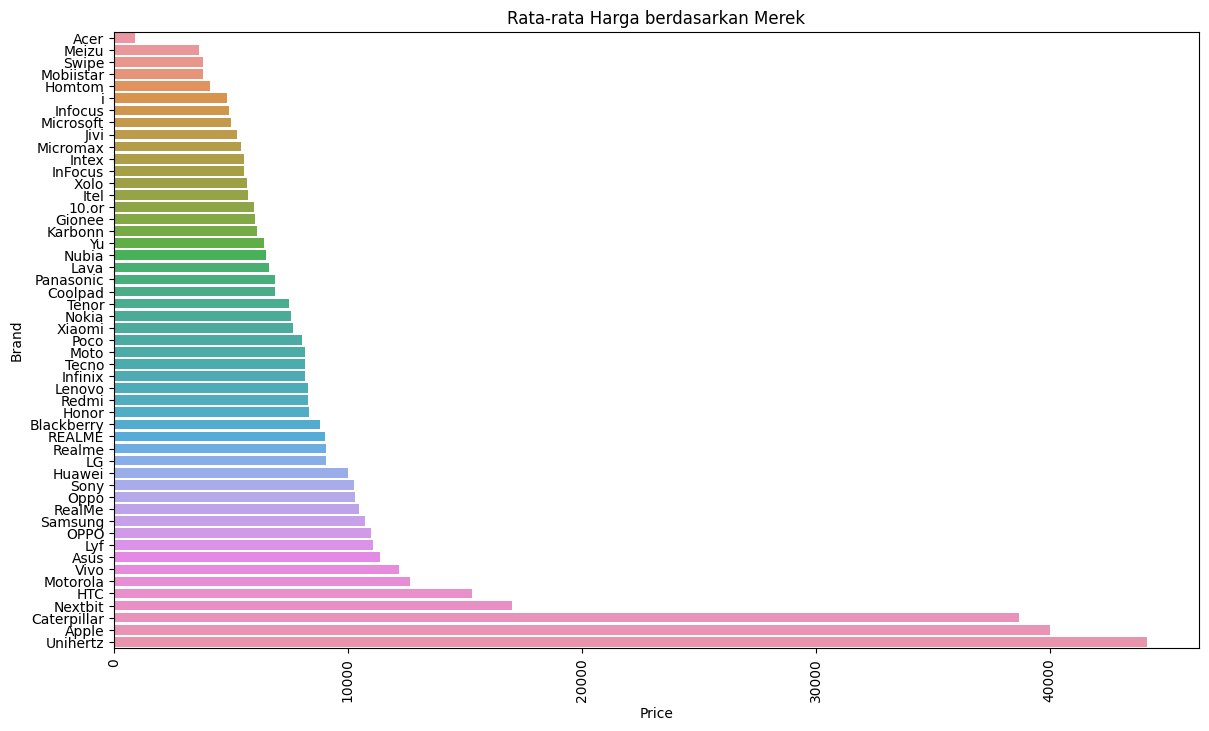

 Brand dengan harga terendah adalah Acer
Statistic: 
count      1.0
mean     905.0
std        NaN
min      905.0
25%      905.0
50%      905.0
75%      905.0
max      905.0
Name: Price, dtype: float64


In [106]:
# Jawab

# Filter data based on Memory < 64 & rating = 1
df_filter = df[(df['Memory (GB)'] < 64) & (df['Rating'] == 1)]

# Group aggregated data
average_price = df_filter.groupby('Brand')['Price'].mean().reset_index()

# Sort data ascending order
sorted = average_price.sort_values(by='Price', ascending=True)

# Display
plt.figure(figsize=(14, 8))
plt.title('Rata-rata Harga berdasarkan Merek')
plt.xlabel('Brand')
plt.ylabel('Rata-rata Harga')
sns.barplot(x='Price', y='Brand', data=sorted)
plt.xticks(rotation=90)
plt.show()

# Cheapest brand
cheapest = sorted.iloc[0]['Brand']
print(f" Brand dengan harga terendah adalah {cheapest}")



statistic = df_filter[df_filter['Brand'] == cheapest]['Price'].describe()
print(f"Statistic: \n{statistic}")

 Saya telah memilih untuk menggunakan horizontal bar chart karena grafik ini efektif untuk membandingkan rata-rata harga berdasarkan merek. Bar chart memberikan kejelasan dan kemudahan pemahaman, serta sangat cocok untuk membandingkan data atau kategori-kategori yang berbedal Dengan chart ini, dapat terlihat jelas perbandingan harga semua merek yang
 sudah diurutkan dari terkecil hingga terbesar


Brand dengan memiliki kapasitas penyimpanan kurang dari 64 GB dan memiliki rating 1 terendah adalah **Acer**